Uploading data

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Importing Useful libraries

In [ ]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Loadind Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Andrew/telecom_churn_rate.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [ ]:
df.info(verbose=1, null_counts=True, memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

In [ ]:
df.shape

(99999, 226)

In [ ]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [ ]:
init_rows, init_cols = df.shape
print("Total rows in data", init_rows)
print("Total columns in data", init_cols)

Total rows in data 99999
Total columns in data 226


In [ ]:
# percentage of missing values in each column
round(100 * (df.isnull().sum()/len(df)),2).sort_values(ascending=False)

arpu_3g_6            74.85
night_pck_user_6     74.85
total_rech_data_6    74.85
arpu_2g_6            74.85
max_rech_data_6      74.85
                     ...  
max_rech_amt_7        0.00
max_rech_amt_6        0.00
total_rech_amt_9      0.00
total_rech_amt_8      0.00
sep_vbc_3g            0.00
Length: 226, dtype: float64

In [ ]:
# Percentage of missing values
missing_percentage = pd.DataFrame(round(100*(df.isnull().sum()/len(df.index)), 2), columns=['Percentage'])
missing_percentage.reset_index(inplace=True)
missing_percentage.rename(columns={'index':'features'}, inplace=True)
print("Missing Percentage < 10% ", missing_percentage[(missing_percentage['Percentage'] > 0.00) & (missing_percentage['Percentage'] < 10.00)].count())
print("Missing Percentage 10-60% ", missing_percentage[(missing_percentage['Percentage'] >= 10.00) & (missing_percentage['Percentage'] < 60.00)].count())
print("Missing Percentage >= 60% ", missing_percentage[(missing_percentage['Percentage'] >= 60.00)].count())

Missing Percentage < 10%  features      126
Percentage    126
dtype: int64
Missing Percentage 10-60%  features      0
Percentage    0
dtype: int64
Missing Percentage >= 60%  features      40
Percentage    40
dtype: int64


In [ ]:
# For 60% missing value and more
missing_percentage[(missing_percentage['Percentage'] > 60.00)]
# When the date of last recharge data is blank for a user, the corresponding recharge data related attributes such as count_rech_3g, total_rech_data, and  arpu_2g are also blank with the same percentage of missing as the month wise last recharge date column, implying that the user did not recharge any data for that month.
# -  As a result, we can replace the NAN values in the above recharge data attributes with 0.
df.fb_user_8.value_counts()
no_data_rech_cols = list(missing_percentage[(missing_percentage['Percentage'] > 60.00)].features)
no_data_rech_cols
# Replacing those missing values with 0 for above columns
df[no_data_rech_cols] = df[no_data_rech_cols].fillna(value=0)


In [ ]:
# Checking missing_percentage data frame with high_value_cust_tele
# Checking the percentage of missing values
missing_percentage = pd.DataFrame(round(100*(df.isnull().sum()/len(df.index)), 2), columns=['Percentage'])
missing_percentage.reset_index(inplace=True)
missing_percentage.rename(columns={'index':'features'}, inplace=True)

print("Missing Percentage > 60% ", missing_percentage[(missing_percentage['Percentage'] > 60.00)].count())


Missing Percentage > 60%  features      0
Percentage    0
dtype: int64


In [ ]:
# Other features are having less than 10% of missing data.
# Considering attributes with less than 6% missing value
missing_percentage[(missing_percentage['Percentage'] > 0.00) & (missing_percentage['Percentage'] < 10.00)]

,features,Percentage
2,loc_og_t2o_mou,1.02
3,std_og_t2o_mou,1.02
4,loc_ic_t2o_mou,1.02
6,last_date_of_month_7,0.60
7,last_date_of_month_8,1.10
...,...,...
136,ic_others_9,7.75
149,date_of_last_rech_6,1.61
150,date_of_last_rech_7,1.77
151,date_of_last_rech_8,3.62


In [ ]:
# Checking data in loc_og_t2o_mou attribute
df['loc_og_t2o_mou'].value_counts()

0.0    98981
Name: loc_og_t2o_mou, dtype: int64

In [ ]:
# Checking data in std_og_t2o_mou attribute
df['std_og_t2o_mou'].value_counts()



0.0    98981
Name: std_og_t2o_mou, dtype: int64

In [ ]:
# Checking data in loc_ic_t2o_mou attribute
df['loc_ic_t2o_mou'].value_counts()

0.0    98981
Name: loc_ic_t2o_mou, dtype: int64

In [ ]:

# We decide to drop the above 3 columns `loc_ic_t2o_mou, loc_og_t2o_mou, std_og_t2o_mou` as most of the values are 0 and have 1% missing values, so we can drop these cols.
# Dropping above mentioned cols
df.drop(['std_og_t2o_mou', 'loc_og_t2o_mou', 'loc_ic_t2o_mou'], axis=1, inplace=True)
df.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,...,0,1.0,1.0,1.0,0.0,968,30.4,0.0,101.20,3.58
1,7001865778,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,...,0,0.0,1.0,1.0,0.0,1006,0.0,0.0,0.00,0.00
2,7001625959,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,...,0,0.0,0.0,0.0,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,...,0,0.0,0.0,0.0,0.0,2491,0.0,0.0,0.00,0.00
4,7000142493,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,...,0,0.0,0.0,0.0,0.0,1526,0.0,0.0,0.00,0.00


In [ ]:
# `last_date_of_month_7` `last_date_of_month_8` and `last_date_of_month_9` null values are replaced by 7/31/2014, 8/31/2014, 9/30/2014.
# Filling last date of month columns with last date
df['last_date_of_month_7'] = df['last_date_of_month_7'].fillna(value='7/31/2014')
df['last_date_of_month_8'] = df['last_date_of_month_8'].fillna(value='8/31/2014')
df['last_date_of_month_9'] = df['last_date_of_month_9'].fillna(value='9/30/2014')


In [ ]:
 #Checking distribution of recharge date in date_of_last_rech_6
df['date_of_last_rech_6'].value_counts()

6/30/2014     16960
6/29/2014     12918
6/27/2014     11169
6/28/2014      9491
6/26/2014      5530
6/25/2014      4896
6/17/2014      4145
6/24/2014      4129
6/14/2014      3845
6/21/2014      3747
6/23/2014      2908
6/18/2014      2747
06-12-2014     2511
6/22/2014      2344
6/13/2014      2147
6/19/2014      2009
6/20/2014      1803
6/16/2014      1126
6/15/2014       873
06-11-2014      579
06-08-2014      520
06-05-2014      327
06-07-2014      322
06-10-2014      283
06-03-2014      233
06-01-2014      218
06-09-2014      199
06-06-2014      173
06-04-2014      131
06-02-2014      109
Name: date_of_last_rech_6, dtype: int64

In [ ]:
# Checking distribution of recharge date in date_of_last_rech_7
df['date_of_last_rech_7'].value_counts()

7/31/2014     17288
7/30/2014     13863
7/25/2014      9401
7/29/2014      9052
7/28/2014      7502
7/27/2014      5909
7/26/2014      5382
7/24/2014      3998
7/19/2014      3057
7/22/2014      2969
7/20/2014      2892
7/17/2014      2737
7/16/2014      2458
7/23/2014      2302
7/21/2014      1640
7/15/2014      1562
7/18/2014      1280
07-10-2014      859
07-09-2014      827
07-12-2014      732
7/14/2014       452
07-11-2014      408
7/13/2014       324
07-06-2014      313
07-04-2014      251
07-08-2014      201
07-07-2014      153
07-03-2014      153
07-05-2014      125
07-01-2014       74
07-02-2014       68
Name: date_of_last_rech_7, dtype: int64

In [ ]:
# Checking distribution of recharge date in date_of_last_rech_8
df['date_of_last_rech_8'].value_counts()

8/31/2014     14706
8/30/2014     11707
8/29/2014     10057
8/28/2014      9816
8/26/2014      9297
8/24/2014      7722
8/25/2014      7655
8/27/2014      5688
8/22/2014      2017
8/20/2014      1986
8/23/2014      1806
8/19/2014      1590
8/21/2014      1347
8/18/2014      1027
08-09-2014      984
08-05-2014      943
8/14/2014       890
8/15/2014       813
8/16/2014       756
8/17/2014       735
08-12-2014      716
8/13/2014       705
08-08-2014      676
08-06-2014      618
08-11-2014      555
08-07-2014      447
08-10-2014      361
08-01-2014      254
08-02-2014      206
08-04-2014      170
08-03-2014      127
Name: date_of_last_rech_8, dtype: int64

In [ ]:
# Checking distribution of recharge date in date_of_last_rech_9
df['date_of_last_rech_9'].value_counts()

9/29/2014     22623
9/30/2014     21713
9/28/2014     10601
9/27/2014      6473
9/26/2014      6282
9/25/2014      5617
9/24/2014      3224
9/21/2014      2888
9/20/2014      2579
9/23/2014      2435
9/22/2014      1617
9/19/2014      1109
9/16/2014       889
9/17/2014       753
9/18/2014       653
9/14/2014       608
09-11-2014      555
9/15/2014       535
09-10-2014      481
09-12-2014      443
9/13/2014       440
09-09-2014      434
09-06-2014      434
09-02-2014      429
09-03-2014      338
09-05-2014      295
09-08-2014      257
09-04-2014      202
09-07-2014      199
09-01-2014      133
Name: date_of_last_rech_9, dtype: int64

In [ ]:
# Mode was used to fill the missing data in the last date of recharge cols
df['date_of_last_rech_6'] = df['date_of_last_rech_6'].fillna(
    value=df['date_of_last_rech_6'].mode()[0])

df['date_of_last_rech_7'] = df['date_of_last_rech_7'].fillna(
    value=df['date_of_last_rech_7'].mode()[0])

df['date_of_last_rech_8'] = df['date_of_last_rech_8'].fillna(
    value=df['date_of_last_rech_8'].mode()[0])

df['date_of_last_rech_9'] = df['date_of_last_rech_9'].fillna(
    value=df['date_of_last_rech_9'].mode()[0])

In [ ]:
# Checking the percentage of missing values
missing_percentage = pd.DataFrame(round(100*(df.isnull().sum()/len(df.index)), 2), columns=['Percentage'])
missing_percentage.reset_index(inplace=True)
missing_percentage.rename(columns={'index':'features'}, inplace=True)
print("Missing Percentage < 10% ", missing_percentage[(missing_percentage['Percentage'] > 0.00) & (missing_percentage['Percentage'] < 10.00)].count())
print("Missing Percentage 10-60% ", missing_percentage[(missing_percentage['Percentage'] >= 10.00) & (missing_percentage['Percentage'] < 60.00)].count())
print("Missing Percentage >= 60% ", missing_percentage[(missing_percentage['Percentage'] >= 60.00)].count())

Missing Percentage < 10%  features      116
Percentage    116
dtype: int64
Missing Percentage 10-60%  features      0
Percentage    0
dtype: int64
Missing Percentage >= 60%  features      0
Percentage    0
dtype: int64


In [ ]:
missing_percentage[(missing_percentage['Percentage'] > 0.00) & (missing_percentage['Percentage'] < 10.00)]

,features,Percentage
10,onnet_mou_6,3.94
11,onnet_mou_7,3.86
12,onnet_mou_8,5.38
13,onnet_mou_9,7.75
14,offnet_mou_6,3.94
...,...,...
129,isd_ic_mou_9,7.75
130,ic_others_6,3.94
131,ic_others_7,3.86
132,ic_others_8,5.38


In [ ]:
# All month wise attributes Missing Percentage is similar like 3.94 % in month 6, 3.86 % in month 7 and 5.38 % in month 8 and 7.75 % in month 9 .
# where Onnet and offnet minute of usages i.e. Call Usages are blank for months other call usage related attributes are also blank that implies that the user didn't make any call.
# So we can replace attribute NAN values with 0 
# Filling null columns with zero for month 6, 7, 8, 9


missing_cols = missing_percentage[(missing_percentage['Percentage'] == 3.94) | (missing_percentage['Percentage'] == 3.86) |
                                (missing_percentage['Percentage'] == 5.38) | (missing_percentage['Percentage'] == 7.75)].features

In [ ]:
df[missing_cols] = df[missing_cols].fillna(value=0)

In [ ]:
# Checking the percentage of missing values
missing_percentage = pd.DataFrame(round(100*(df.isnull().sum()/len(df.index)), 2), columns=['Percentage'])
missing_percentage.reset_index(inplace=True)
missing_percentage.rename(columns={'index':'features'}, inplace=True)
print("Missing Percentage < 10% ", missing_percentage[(missing_percentage['Percentage'] > 0.00) & (missing_percentage['Percentage'] < 10.00)].count())
print("Missing Percentage 10-60% ", missing_percentage[(missing_percentage['Percentage'] >= 10.00) & (missing_percentage['Percentage'] < 60.00)].count())
print("Missing Percentage >= 60% ", missing_percentage[(missing_percentage['Percentage'] >= 60.00)].count())

Missing Percentage < 10%  features      0
Percentage    0
dtype: int64
Missing Percentage 10-60%  features      0
Percentage    0
dtype: int64
Missing Percentage >= 60%  features      0
Percentage    0
dtype: int64


In [ ]:
# Missing values in dataset are now handled

In [ ]:
# Filtering high value customer data set from telecom data
df['average_recharge_goodphase'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/(
    df['total_rech_num_6'] + df['total_rech_num_7'])
# Finding 70% of average of recharge
var = round(df['average_recharge_goodphase'].quantile(0.7), 2)
print("70% of average Recharge Amount of month 6 and 7", var)



70% of average Recharge Amount of month 6 and 7 56.39


In [ ]:

high_value_cust_df = df[(df.average_recharge_goodphase >= var)]
high_value_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29944 entries, 0 to 99998
Columns: 224 entries, mobile_number to average_recharge_goodphase
dtypes: float64(177), int64(35), object(12)
memory usage: 51.4+ MB


In [ ]:
df['average_recharge_goodphase'] 

0         87.714286
1         35.230769
2         53.666667
3         25.714286
4         49.636364
            ...    
99994     34.000000
99995     27.500000
99996     17.000000
99997    105.571429
99998    142.000000
Name: average_recharge_goodphase, Length: 99999, dtype: float64

In [ ]:
# Dropping the average_recharge_goodphase column
high_value_cust_df.drop(['average_recharge_goodphase'], axis=1, inplace=True)

In [ ]:
high_value_cust_df.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,...,0,1.0,1.0,1.0,0.0,968,30.40,0.00,101.20,3.58
7,7000701601,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,...,0,0.0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00
9,7001864400,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,119.518,247.435,170.231,160.042,...,0,0.0,1.0,0.0,0.0,902,0.00,0.00,0.00,0.00
13,7002191713,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,205.671,593.260,322.732,...,0,0.0,0.0,1.0,0.0,2607,0.00,0.00,0.00,0.00
16,7000875565,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,299.869,187.894,206.490,...,0,0.0,0.0,0.0,0.0,511,0.00,2.45,21.89,0.00


In [ ]:
# #### Tag Churn/Non-Churn based on ninth month attributes
variable_list = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
churning_info = high_value_cust_df[variable_list]
churning_info.head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.0,0.0
7,0.00,0.00,0.0,0.0
9,412.63,151.33,0.0,0.0
13,631.86,446.09,0.0,0.0
16,334.56,255.74,0.0,0.0


In [ ]:
churning_info.isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [ ]:
# There are no null values in above attributes

In [ ]:
def detecting_churn(df):
    if((df['total_ic_mou_9'] == 0.0) & (df['total_og_mou_9'] == 0.0)
      & (df['vol_2g_mb_9'] == 0.0) & (df['vol_3g_mb_9'] == 0.0)):
        return 1
    else:
        return 0

# Applying  Churn detection function high_value_cust_df and creating new column Churn    
high_value_cust_df['Churn'] = churning_info.apply(detecting_churn, axis=1)

In [ ]:
high_value_cust_df.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
0,7000842753,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,...,1.0,1.0,1.0,0.0,968,30.40,0.00,101.20,3.58,1
7,7000701601,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,...,0.0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1
9,7001864400,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,119.518,247.435,170.231,160.042,...,0.0,1.0,0.0,0.0,902,0.00,0.00,0.00,0.00,0
13,7002191713,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,205.671,593.260,322.732,...,0.0,0.0,1.0,0.0,2607,0.00,0.00,0.00,0.00,0
16,7000875565,109,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,299.869,187.894,206.490,...,0.0,0.0,0.0,0.0,511,0.00,2.45,21.89,0.00,0


In [ ]:
# Checking the Churn column with 9th month attributes
churning_info['Churn'] = high_value_cust_df['Churn']
churning_info.head(10)

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,Churn
0,0.00,0.00,0.00,0.00,1
7,0.00,0.00,0.00,0.00,1
9,412.63,151.33,0.00,0.00,0
13,631.86,446.09,0.00,0.00,0
16,334.56,255.74,0.00,0.00,0
19,50.38,25.31,0.00,0.00,0
20,240.93,293.83,0.00,0.00,0
22,7.51,0.68,0.00,0.00,0
23,127.48,127.63,13.93,314.74,0
24,330.03,627.78,0.00,0.00,0


In [ ]:
# Removing all attributes corresponding to Churn phase
non_churn_cols = [i  for i in high_value_cust_df.columns if "_9" not in i]
len(non_churn_cols)

170

In [ ]:
non_churn_cols

['mobile_number',
 'circle_id',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_

In [ ]:
# Keeping the dataset with non-churn phase attributes only
high_value_cust_tele = high_value_cust_df[non_churn_cols]
high_value_cust_tele.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
0,7000842753,109,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,0.00,0.00,...,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1
7,7000701601,109,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,...,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1
9,7001864400,109,6/30/2014,7/31/2014,8/31/2014,119.518,247.435,170.231,33.89,30.11,...,0,0.0,1.0,0.0,902,0.00,0.00,0.00,0.00,0
13,7002191713,109,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,593.260,501.76,108.39,...,0,0.0,0.0,1.0,2607,0.00,0.00,0.00,0.00,0
16,7000875565,109,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,187.894,50.51,74.01,...,0,0.0,0.0,0.0,511,0.00,2.45,21.89,0.00,0


In [ ]:
high_value_cust_tele.shape

(29944, 170)

In [ ]:
high_value_cust_tele.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29944 entries, 0 to 99998
Data columns (total 170 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             29944 non-null  int64  
 1    circle_id                 29944 non-null  int64  
 2    last_date_of_month_6      29944 non-null  object 
 3    last_date_of_month_7      29944 non-null  object 
 4    last_date_of_month_8      29944 non-null  object 
 5    arpu_6                    29944 non-null  float64
 6    arpu_7                    29944 non-null  float64
 7    arpu_8                    29944 non-null  float64
 8    onnet_mou_6               29944 non-null  float64
 9    onnet_mou_7               29944 non-null  float64
 10   onnet_mou_8               29944 non-null  float64
 11   offnet_mou_6              29944 non-null  float64
 12   offnet_mou_7              29944 non-null  float64
 13   offnet_mou_8              29944 non-null  fl

In [ ]:
# The data collection handles all missing values. To avoid losing information in the class imbalance data set, most missing values are imputed with zero.

# Exploratory data analysis

std_ic -> incoming
T2O -> Operator T to other operator fixed line

In [ ]:
# Checking recharge date distribution in std_ic_t2o_mou_6
high_value_cust_tele['std_ic_t2o_mou_6'].value_counts()

0.0    29944
Name: std_ic_t2o_mou_6, dtype: int64

In [ ]:
# Checking recharge date distribution in std_ic_t2o_mou_7
high_value_cust_tele['std_ic_t2o_mou_7'].value_counts()

0.0    29944
Name: std_ic_t2o_mou_7, dtype: int64

In [ ]:
# Checking recharge date distribution in std_ic_t2o_mou_8
high_value_cust_tele['std_ic_t2o_mou_8'].value_counts()

0.0    29944
Name: std_ic_t2o_mou_8, dtype: int64

std_og -> std outgoing
T2C -> Operator T to it’s own call center

In [ ]:
# Checking recharge date distribution in std_og_t2c_mou_6
high_value_cust_tele['std_og_t2c_mou_6'].value_counts()

0.0    29944
Name: std_og_t2c_mou_6, dtype: int64

In [ ]:
# Checking recharge date distribution in std_og_t2c_mou_7
high_value_cust_tele['std_og_t2c_mou_7'].value_counts()

0.0    29944
Name: std_og_t2c_mou_7, dtype: int64

In [ ]:
# Checking recharge date distribution in std_og_t2c_mou_8
high_value_cust_tele['std_og_t2c_mou_8'].value_counts()

0.0    29944
Name: std_og_t2c_mou_8, dtype: int64

In [ ]:
# The following attributes which are T2O/T2C minute usage in incoming & outgoing STD calls attributes have no data in them so we can drop them
# - std_ic_t2o_mou_6
# - std_ic_t2o_mou_7
# - std_ic_t2o_mou_8
# - std_og_t2c_mou_6
# - std_og_t2c_mou_7
# - std_og_t2c_mou_8

dropping = ['std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8']
high_value_cust_tele.drop(columns=dropping, axis=1, inplace=True)

In [ ]:
high_value_cust_tele.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
0,7000842753,109,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,0.00,0.00,...,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1
7,7000701601,109,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,...,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1
9,7001864400,109,6/30/2014,7/31/2014,8/31/2014,119.518,247.435,170.231,33.89,30.11,...,0,0.0,1.0,0.0,902,0.00,0.00,0.00,0.00,0
13,7002191713,109,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,593.260,501.76,108.39,...,0,0.0,0.0,1.0,2607,0.00,0.00,0.00,0.00,0
16,7000875565,109,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,187.894,50.51,74.01,...,0,0.0,0.0,0.0,511,0.00,2.45,21.89,0.00,0


In [ ]:
# Dropping the phone number attribute as its no use in model
high_value_cust_tele.drop(['mobile_number'], axis=1, inplace=True)

In [ ]:
high_value_cust_tele.head()

,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
0,109,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,0.00,0.00,0.00,...,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1
7,109,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,...,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1
9,109,6/30/2014,7/31/2014,8/31/2014,119.518,247.435,170.231,33.89,30.11,22.43,...,0,0.0,1.0,0.0,902,0.00,0.00,0.00,0.00,0
13,109,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,593.260,501.76,108.39,534.24,...,0,0.0,0.0,1.0,2607,0.00,0.00,0.00,0.00,0
16,109,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,187.894,50.51,74.01,70.61,...,0,0.0,0.0,0.0,511,0.00,2.45,21.89,0.00,0


In [ ]:
high_value_cust_tele.circle_id.value_counts()

109    29944
Name: circle_id, dtype: int64

In [ ]:
# For the whole data collection, the cirle_id attribute column has only one value. As a result, the column has been removed.
high_value_cust_tele.drop(['circle_id'], axis=1, inplace=True)

In [ ]:
# Changing type of date related attributes
date_cols = [cols for cols in high_value_cust_tele.columns if "date" in cols]
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [ ]:
high_value_cust_tele[date_cols].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/21/2014,7/16/2014,08-08-2014,6/21/2014,7/16/2014,08-08-2014
7,6/30/2014,7/31/2014,8/31/2014,6/27/2014,7/25/2014,8/26/2014,0,0,0
9,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/23/2014,8/29/2014,0,7/23/2014,0
13,6/30/2014,7/31/2014,8/31/2014,6/20/2014,7/22/2014,8/30/2014,0,0,8/30/2014
16,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/14/2014,0,0,0


In [ ]:
high_value_cust_tele[date_cols] = high_value_cust_tele[date_cols].apply(pd.to_datetime)

In [ ]:
high_value_cust_tele[date_cols].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-30,2014-07-31,2014-08-31,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16,2014-08-08
7,2014-06-30,2014-07-31,2014-08-31,2014-06-27,2014-07-25,2014-08-26,1970-01-01,1970-01-01,1970-01-01
9,2014-06-30,2014-07-31,2014-08-31,2014-06-29,2014-07-23,2014-08-29,1970-01-01,2014-07-23,1970-01-01
13,2014-06-30,2014-07-31,2014-08-31,2014-06-20,2014-07-22,2014-08-30,1970-01-01,1970-01-01,2014-08-30
16,2014-06-30,2014-07-31,2014-08-31,2014-06-30,2014-07-31,2014-08-14,1970-01-01,1970-01-01,1970-01-01


In [ ]:
# assessing the user's most recent data/call recharge in days for the previous 6, 7, or 8 months

def last_rech_day(df, str_month_num):
    d1 = df['last_date_of_month_'+str_month_num] - df['date_of_last_rech_'+str_month_num]
    d2 = df['last_date_of_month_'+str_month_num] - df['date_of_last_rech_data_'+str_month_num]
    if(d1.dt.days <= d2.dt.days).any():
        return d1.dt.days
    else:
        return d2.dt.days

In [ ]:
# Applying the function for all months
high_value_cust_tele['last_rech_day_6'] = last_rech_day(high_value_cust_tele, "6")
high_value_cust_tele['last_rech_day_7'] = last_rech_day(high_value_cust_tele, "7")
high_value_cust_tele['last_rech_day_8'] = last_rech_day(high_value_cust_tele, "8")


In [ ]:
high_value_cust_tele['last_rech_day_6']

0         9
7         3
9         1
13       10
16        0
         ..
99985    14
99986    10
99989     3
99997    13
99998    14
Name: last_rech_day_6, Length: 29944, dtype: int64

In [ ]:
# Dropping date columns
high_value_cust_tele.drop(columns=date_cols, axis=1, inplace=True)

In [ ]:
high_value_cust_tele.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn,last_rech_day_6,last_rech_day_7,last_rech_day_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.0,968,30.40,0.00,101.20,3.58,1,9,15,23
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0.0,802,57.74,19.38,18.74,0.00,1,3,6,5
9,119.518,247.435,170.231,33.89,30.11,22.43,63.48,54.16,78.34,0.00,...,0.0,902,0.00,0.00,0.00,0.00,0,1,8,2
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,1.0,2607,0.00,0.00,0.00,0.00,0,10,9,1
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0.0,511,0.00,2.45,21.89,0.00,0,0,0,17


In [ ]:
high_value_cust_tele.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29944 entries, 0 to 99998
Data columns (total 156 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    arpu_6              29944 non-null  float64
 1    arpu_7              29944 non-null  float64
 2    arpu_8              29944 non-null  float64
 3    onnet_mou_6         29944 non-null  float64
 4    onnet_mou_7         29944 non-null  float64
 5    onnet_mou_8         29944 non-null  float64
 6    offnet_mou_6        29944 non-null  float64
 7    offnet_mou_7        29944 non-null  float64
 8    offnet_mou_8        29944 non-null  float64
 9    roam_ic_mou_6       29944 non-null  float64
 10   roam_ic_mou_7       29944 non-null  float64
 11   roam_ic_mou_8       29944 non-null  float64
 12   roam_og_mou_6       29944 non-null  float64
 13   roam_og_mou_7       29944 non-null  float64
 14   roam_og_mou_8       29944 non-null  float64
 15   loc_og_t2t_mou_6    29944 non-null

In [ ]:
# Some of the attributes like count of recharge columns, user having Facebook account or not and total recharge count should be in integer datatype.
integer_columns = [i for i in high_value_cust_tele.columns if ("count" in i) or ("fb" in i)]

# total 6 columns are there for recharge count
integer_columns.extend(['total_rech_num_6','total_rech_num_7', 'total_rech_num_8', 
                'total_rech_data_6','total_rech_data_7', 'total_rech_data_8'])

integer_columns


['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8']

In [ ]:
high_value_cust_tele[integer_columns] = high_value_cust_tele[integer_columns].astype('int64')

In [ ]:
high_value_cust_tele.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29944 entries, 0 to 99998
Data columns (total 156 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    arpu_6              29944 non-null  float64
 1    arpu_7              29944 non-null  float64
 2    arpu_8              29944 non-null  float64
 3    onnet_mou_6         29944 non-null  float64
 4    onnet_mou_7         29944 non-null  float64
 5    onnet_mou_8         29944 non-null  float64
 6    offnet_mou_6        29944 non-null  float64
 7    offnet_mou_7        29944 non-null  float64
 8    offnet_mou_8        29944 non-null  float64
 9    roam_ic_mou_6       29944 non-null  float64
 10   roam_ic_mou_7       29944 non-null  float64
 11   roam_ic_mou_8       29944 non-null  float64
 12   roam_og_mou_6       29944 non-null  float64
 13   roam_og_mou_7       29944 non-null  float64
 14   roam_og_mou_8       29944 non-null  float64
 15   loc_og_t2t_mou_6    29944 non-null

In [ ]:
high_value_cust_tele.head(10)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn,last_rech_day_6,last_rech_day_7,last_rech_day_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,968,30.40,0.00,101.20,3.58,1,9,15,23
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,802,57.74,19.38,18.74,0.00,1,3,6,5
9,119.518,247.435,170.231,33.89,30.11,22.43,63.48,54.16,78.34,0.00,...,0,902,0.00,0.00,0.00,0.00,0,1,8,2
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,1,2607,0.00,0.00,0.00,0.00,0,10,9,1
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0,511,0.00,2.45,21.89,0.00,0,0,0,17
19,163.430,241.218,326.920,4.04,7.38,13.61,0.51,41.28,9.46,0.00,...,1,1104,454.53,466.06,0.00,0.00,0,3,6,5
20,271.699,421.474,364.251,72.41,86.73,71.18,198.84,225.38,132.51,0.00,...,0,3108,1.11,0.22,0.00,0.00,0,16,21,4
22,281.076,26.291,0.000,36.59,5.09,0.00,388.51,5.13,0.00,0.00,...,0,396,0.00,0.00,0.00,0.00,0,11,28,3
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,1,604,40.45,51.86,0.00,0.00,0,12,24,7
24,422.050,359.730,354.793,124.19,55.19,141.11,450.33,370.48,283.36,9.30,...,0,3072,0.00,0.00,0.00,0.00,0,7,14,0


In [ ]:
# Checking the data distribution to know that data is biased or not.
100*(high_value_cust_tele.Churn.value_counts(normalize=True))

0    91.310446
1     8.689554
Name: Churn, dtype: float64

In [ ]:
# We can observe that data is highly imbalanced as 8% of data is churned and 92% is non churned.

In [ ]:
# Checking Minute of Usage related columns.
mou_columns = [i for i in high_value_cust_tele.columns if "mou" in i]
print("Total MOU attributes", len(mou_columns))


Total MOU attributes 81


In [ ]:
high_value_cust_tele[mou_columns].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8
count,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,...,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000
mean,215.806269,216.449542,195.627181,329.774497,329.255905,300.435473,15.834159,12.316899,12.126366,25.837412,...,42.869734,274.042211,279.592188,267.660504,0.053767,0.013004,0.020984,11.336265,12.281301,11.361568
std,408.813705,420.785528,403.907438,439.251291,453.748322,438.463262,72.485743,69.479316,66.913546,112.123819,...,132.079963,330.109976,341.970210,332.599423,0.139624,0.090914,0.107614,83.460799,87.257671,72.539676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.597500,18.110000,13.097500,81.902500,75.130000,58.005000,0.000000,0.000000,0.000000,0.000000,...,0.360000,73.125000,77.510000,64.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74.880000,70.185000,61.030000,198.235000,191.990000,171.260000,0.000000,0.000000,0.000000,0.000000,...,8.910000,182.185000,185.190000,176.735000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.945000,213.015000,188.280000,405.910000,404.050000,376.450000,0.000000,0.000000,0.000000,0.000000,...,37.360000,357.310000,361.952500,349.412500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,2589.090000,2877.060000,2663.110000,3775.110000,...,5957.140000,7074.590000,9699.010000,10830.380000,3.560000,6.430000,6.230000,6789.410000,5289.540000,4127.010000


In [ ]:
# Looking into maximum recharge data and average recharge data columns.
high_value_cust_tele[['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
             'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']].describe(percentiles=[.25,.5,.75,.90,.95,.99])


,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000,29944.000000
mean,62.562016,63.014527,59.461528,88.399412,92.021679,86.278520
std,111.275324,112.187623,109.136924,188.866476,194.415702,184.297543
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,152.000000,145.000000,154.000000,154.000000,154.000000
90%,252.000000,252.000000,252.000000,274.000000,274.000000,252.000000
95%,252.000000,252.000000,252.000000,431.000000,455.000000,435.000000
99%,455.000000,455.000000,455.000000,756.000000,854.570000,808.000000


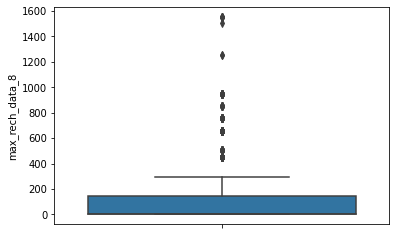

In [ ]:
sns.boxplot(data=high_value_cust_tele, y='max_rech_data_8')


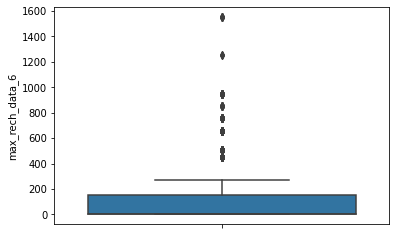

In [ ]:
sns.boxplot(data=high_value_cust_tele, y='max_rech_data_6')

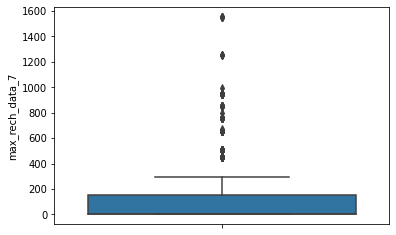

In [ ]:
sns.boxplot(data=high_value_cust_tele, y='max_rech_data_7')

In [ ]:
cols=['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
             'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

high_value_cust_tele[(high_value_cust_tele['max_rech_data_6'] > 1200) & (high_value_cust_tele['max_rech_data_7'] > 1200)
           & (high_value_cust_tele['max_rech_data_8'] > 1200)][cols]

,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
11530,1,2,1,1555.0,1555.0,1505.0,1555.0,2506.0,1505.0
27531,4,3,3,1555.0,1555.0,1555.0,5920.0,4365.0,4061.0
36883,1,1,1,1555.0,1555.0,1555.0,1555.0,1555.0,1555.0
46998,2,3,2,1555.0,1555.0,1555.0,3110.0,3765.0,2506.0
80216,1,1,2,1555.0,1555.0,1555.0,1555.0,1555.0,2506.0
81699,1,1,2,1555.0,1555.0,1555.0,1555.0,1555.0,1580.0


In [ ]:
# Clearly above values are outliers for these columns so we can remove these rows

In [ ]:
high_value_cust_tele = high_value_cust_tele[(high_value_cust_tele['max_rech_data_6'] < 1200) & (high_value_cust_tele['max_rech_data_7'] < 1200)
           & (high_value_cust_tele['max_rech_data_8'] < 1200)]


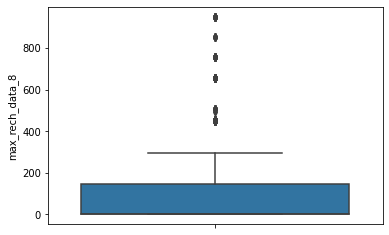

In [ ]:
sns.boxplot(data=high_value_cust_tele, y='max_rech_data_8')

In [ ]:
cols=['total_rech_data_6', 'max_rech_data_6', 'av_rech_amt_data_6']

high_value_cust_tele[(high_value_cust_tele['total_rech_data_6'] > 1) & 
            (high_value_cust_tele['total_rech_data_6'] * high_value_cust_tele['max_rech_data_6'] == high_value_cust_tele['av_rech_amt_data_6'])][cols]

,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
149,2,152.0,304.0
170,2,198.0,396.0
176,2,252.0,504.0
188,2,252.0,504.0
204,2,252.0,504.0
...,...,...,...
99598,3,252.0,756.0
99628,2,152.0,304.0
99822,2,252.0,504.0
99899,2,252.0,504.0


In [ ]:
cols=['total_rech_data_7', 'max_rech_data_7', 'av_rech_amt_data_7']

high_value_cust_tele[(high_value_cust_tele['total_rech_data_7'] > 1) & 
            (high_value_cust_tele['total_rech_data_7'] * high_value_cust_tele['max_rech_data_7'] == high_value_cust_tele['av_rech_amt_data_7'])][cols]

,total_rech_data_7,max_rech_data_7,av_rech_amt_data_7
87,2,154.0,308.0
134,2,152.0,304.0
147,2,152.0,304.0
149,2,152.0,304.0
191,3,252.0,756.0
...,...,...,...
99857,2,14.0,28.0
99923,2,252.0,504.0
99925,2,91.0,182.0
99927,2,152.0,304.0


In [ ]:
cols=['total_rech_data_8', 'max_rech_data_8', 'av_rech_amt_data_8']

high_value_cust_tele[(high_value_cust_tele['total_rech_data_8'] > 1) & 
            (high_value_cust_tele['total_rech_data_8'] * high_value_cust_tele['max_rech_data_8'] == high_value_cust_tele['av_rech_amt_data_8'])][cols]


,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8
13,3,23.0,69.0
102,4,23.0,92.0
115,2,179.0,358.0
149,4,152.0,608.0
176,3,17.0,51.0
...,...,...,...
99670,3,23.0,69.0
99808,6,23.0,138.0
99923,2,252.0,504.0
99925,2,91.0,182.0


In [ ]:
# The above average attributes are wrongly calculated by multiplying no. of recharge and max recharge.
# We need to fix these for all three months.

In [ ]:


# Lets check together which users average miscalculated and what the Churn count
cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
             'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

wrongly_calculated = high_value_cust_tele[(high_value_cust_tele['total_rech_data_6'] > 1) & 
            (high_value_cust_tele['total_rech_data_6'] * high_value_cust_tele['max_rech_data_6'] == high_value_cust_tele['av_rech_amt_data_6']) & 
            (high_value_cust_tele['total_rech_data_7'] > 1) & 
            (high_value_cust_tele['total_rech_data_7'] * high_value_cust_tele['max_rech_data_7'] == high_value_cust_tele['av_rech_amt_data_7']) & 
            (high_value_cust_tele['total_rech_data_8'] > 1) & 
            (high_value_cust_tele['total_rech_data_8'] * high_value_cust_tele['max_rech_data_8'] == high_value_cust_tele['av_rech_amt_data_8'])]

print(wrongly_calculated.shape)
print(wrongly_calculated.Churn.sum())


(329, 156)
5


In [ ]:

# Some rows where all month average are wrongly calculated and Churn rate for these rows are only 5, So we can drop these rows


In [ ]:

# Dropping above rows
high_value_cust_tele.drop(wrongly_calculated.index, inplace=True)


In [ ]:

high_value_cust_tele.Churn.sum()


2593

In [ ]:

# Checking datapoints for Churn count of month 6 whose average values are miscalculated  
cols=['total_rech_data_6', 'max_rech_data_6', 'av_rech_amt_data_6', 'Churn']

high_value_cust_tele[(high_value_cust_tele['total_rech_data_6'] > 1) & 
            (high_value_cust_tele['total_rech_data_6'] * high_value_cust_tele['max_rech_data_6'] == high_value_cust_tele['av_rech_amt_data_6'])].Churn.sum()



114

In [ ]:

# Checking datapoints for Churn count of month 7 whose average values are miscalculated 
cols=['total_rech_data_7', 'max_rech_data_7', 'av_rech_amt_data_7', 'Churn']

high_value_cust_tele[(high_value_cust_tele['total_rech_data_7'] > 1) & 
            (high_value_cust_tele['total_rech_data_7'] * high_value_cust_tele['max_rech_data_7'] == high_value_cust_tele['av_rech_amt_data_7'])].Churn.sum()



83

In [ ]:

# Checking datapoints for Churn count of month 8 whose average values are miscalculated 
cols=['total_rech_data_8', 'max_rech_data_8', 'av_rech_amt_data_8', 'Churn']

high_value_cust_tele[(high_value_cust_tele['total_rech_data_8'] > 1) & 
            (high_value_cust_tele['total_rech_data_8'] * high_value_cust_tele['max_rech_data_8'] == high_value_cust_tele['av_rech_amt_data_8'])].Churn.sum()



36

In [ ]:
# We can observe that churn information of above rows has 10% data so we cannot drop these rows. So we can handle it by dividing the max data by recharge count.

In [ ]:
# We create function for calculating average recharge data for above rows
def cal_avg_rech_data(df, col):
    if((df['total_rech_data_'+col] > 1) & 
            (df['total_rech_data_'+col] * df['max_rech_data_'+col] == df['av_rech_amt_data_'+col])).all():
        return df['max_rech_data_'+col]/df['total_rech_data_'+col]
    else:
        return df['av_rech_amt_data_'+col]

In [ ]:
# Applying the function for all months
high_value_cust_tele['av_rech_amt_data_6'] = cal_avg_rech_data(high_value_cust_tele, "6")
high_value_cust_tele['av_rech_amt_data_7'] = cal_avg_rech_data(high_value_cust_tele, "7")
high_value_cust_tele['av_rech_amt_data_8'] = cal_avg_rech_data(high_value_cust_tele, "8")

In [ ]:
high_value_cust_tele[['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']]

,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
0,252.0,252.0,252.0
7,0.0,0.0,0.0
9,0.0,154.0,0.0
13,0.0,0.0,69.0
16,0.0,0.0,0.0
...,...,...,...
99985,0.0,0.0,0.0
99986,17.0,14.0,25.0
99989,0.0,0.0,0.0
99997,583.0,358.0,716.0


In [ ]:
# We can drop the total reacharge data as it is distributed in 2G and 3G data attributes.

In [ ]:
# Dropping the total recharge data columns
high_value_cust_tele.drop(columns=['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8'], axis=1, inplace=True)
high_value_cust_tele.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn,last_rech_day_6,last_rech_day_7,last_rech_day_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,968,30.40,0.00,101.20,3.58,1,9,15,23
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,802,57.74,19.38,18.74,0.00,1,3,6,5
9,119.518,247.435,170.231,33.89,30.11,22.43,63.48,54.16,78.34,0.00,...,0,902,0.00,0.00,0.00,0.00,0,1,8,2
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,1,2607,0.00,0.00,0.00,0.00,0,10,9,1
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0,511,0.00,2.45,21.89,0.00,0,0,0,17


In [ ]:
# We have considered month 6 and 7 as good phase so we will merge those columns.
columns_6_7 = [col for col in high_value_cust_tele.columns if ("_6" in col) or ("_7" in col)]

for i,j in enumerate(columns_6_7):
    if("_6" in j):
        col = "av_"+j.split("6")[0]+"good"
        high_value_cust_tele[col] = (high_value_cust_tele[j] + high_value_cust_tele[columns_6_7[i+1]])/2

# Dropping the previous 6 and 7 attributes
high_value_cust_tele.drop(columns=columns_6_7, axis=1, inplace=True)

high_value_cust_tele.head()


,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,av_vol_3g_mb_good,av_arpu_3g_good,av_arpu_2g_good,av_night_pck_user_good,av_monthly_2g_good,av_sachet_2g_good,av_monthly_3g_good,av_sachet_3g_good,av_fb_user_good,av_last_rech_day_good
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,117.165,212.17,212.17,0.0,0.0,0.0,1.0,0.0,1.0,12.0
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,...,0.000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.5
9,170.231,22.43,78.34,0.00,0.00,22.43,34.93,0.00,0.00,57.36,...,0.000,0.00,0.00,0.0,0.5,0.0,0.0,0.0,0.5,4.5
13,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,...,0.000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,9.5
16,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,...,0.000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

# Rechecking the percentage of missing values
missing_percentage = pd.DataFrame(round(100*(high_value_cust_tele.isnull().sum()/len(high_value_cust_tele.index)), 2), columns=['Percentage'])
missing_percentage.reset_index(inplace=True)
missing_percentage.rename(columns={'index':'features'}, inplace=True)

print("Missing Percentage < 10% ", missing_percentage[(missing_percentage['Percentage'] > 0.00) & (missing_percentage['Percentage'] < 10.00)].count())
print("Missing Percentage 10-60% ", missing_percentage[(missing_percentage['Percentage'] >= 10.00) & (missing_percentage['Percentage'] < 60.00)].count())
print("Missing Percentage >= 60% ", missing_percentage[(missing_percentage['Percentage'] >= 60.00)].count())


Missing Percentage < 10%  features      0
Percentage    0
dtype: int64
Missing Percentage 10-60%  features      0
Percentage    0
dtype: int64
Missing Percentage >= 60%  features      0
Percentage    0
dtype: int64


In [ ]:
high_value_cust_tele.columns

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       ...
       'av_vol_3g_mb_good', 'av_arpu_3g_good', 'av_arpu_2g_good',
       'av_night_pck_user_good', 'av_monthly_2g_good', 'av_sachet_2g_good',
       'av_monthly_3g_good', 'av_sachet_3g_good', 'av_fb_user_good',
       'av_last_rech_day_good'],
      dtype='object', length=104)

In [ ]:
# Storing the above data set to csv
high_value_cust_tele.to_csv("/content/drive/MyDrive/Andrew/high_value_cust_tele_cleaned.csv")

In [ ]:
# Loading the last stored data set from csv
high_value_cust_tele = pd.read_csv("/content/drive/MyDrive/Andrew/high_value_cust_tele_cleaned.csv")
high_value_cust_tele.drop("Unnamed: 0", axis=1, inplace=True)


In [ ]:
high_value_cust_tele.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,av_vol_3g_mb_good,av_arpu_3g_good,av_arpu_2g_good,av_night_pck_user_good,av_monthly_2g_good,av_sachet_2g_good,av_monthly_3g_good,av_sachet_3g_good,av_fb_user_good,av_last_rech_day_good
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,117.165,212.17,212.17,0.0,0.0,0.0,1.0,0.0,1.0,12.0
1,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,...,0.000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.5
2,170.231,22.43,78.34,0.00,0.00,22.43,34.93,0.00,0.00,57.36,...,0.000,0.00,0.00,0.0,0.5,0.0,0.0,0.0,0.5,4.5
3,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,...,0.000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,9.5
4,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,...,0.000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Dividing data into X and y for splitting into independent and dependent variables.
X = high_value_cust_tele.drop('Churn', axis = 1)
y = high_value_cust_tele['Churn']

In [ ]:
# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=100)


In [ ]:
# Scaling training and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(20717, 103)

In [ ]:
#Applying PCA to reduce the features
#Initializing the PCA module
pca = PCA(svd_solver='randomized', random_state=50)

#Applying PCA on the train data
pca.fit(X_train)


PCA(random_state=50, svd_solver='randomized')

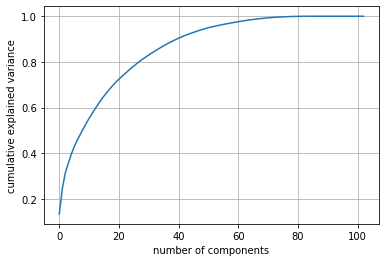

In [ ]:
#Plotting the cumulative variance against the number of components
get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid("grey")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
# We can observe from above plot that 95% variance of data is explained by 50 components.

In [ ]:
# To save the time we use incremental PCA
pca_inc = IncrementalPCA(n_components=50)

# Transforming the X_train final 50 components PCA
pca_train_df = pca_inc.fit_transform(X_train)
pca_train_df.shape

(20717, 50)

In [ ]:
# Checking minimum and maximum correlations between components
corr = np.corrcoef(pca_train_df.transpose())
corr_no_diagonal = corr - np.diagflat(corr.diagonal())
print("max corr:",corr_no_diagonal.max(), ", min corr: ", corr_no_diagonal.min(),)

max corr: 0.033099426149970614 , min corr:  -0.11784858135179148


In [ ]:
# The components show the correlation closer to 0 so we can use them in our model.

In [ ]:
#Applying selected 50 components to the test data 
pca_test_df = pca_inc.transform(X_test)
pca_test_df.shape

(8879, 50)

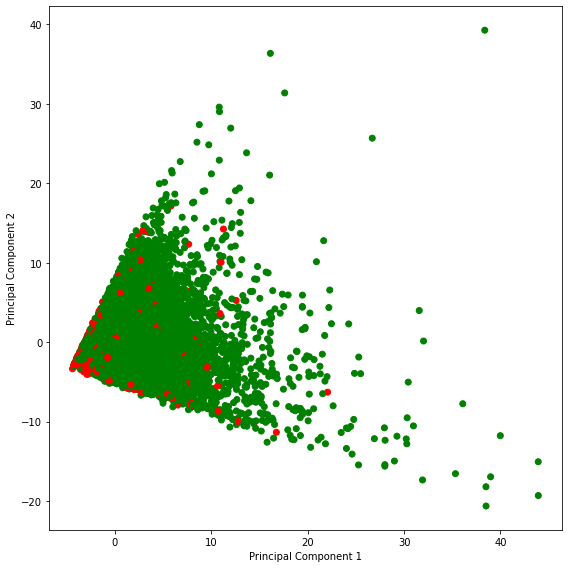

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_train_df[:,0], pca_train_df[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

# Data Modelling

In [ ]:
# Building Logistic Rgression model with applied pca components on train and test. Also we consider class_weight parameter as `balanced` in each model due to class imbalance.

In [ ]:
Logistic_Regression = LogisticRegression(class_weight='balanced')
lr_model = Logistic_Regression.fit(pca_train_df, y_train)

In [ ]:
# Predicting the Churn/Non-Churn using the model
y_pred = lr_model.predict(pca_test_df)

In [ ]:
# Evaluating the model. For evaluation purpose we use Sensitivity or Recall as we are interested in capturing churned or non churned customers.
print("Accuracy Score {0}:".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity/Recall {0}:".format(metrics.recall_score(y_test, y_pred)))
metrics.confusion_matrix(y_test, y_pred)

Accuracy Score 0.813830386304764:
Sensitivity/Recall 0.8691709844559585:


array([[6555, 1552],
       [ 101,  671]])

In [ ]:
# Applying PCA components on Logistic Regression with GridSearchCV
# Tuning the hyperparameters
Log_Reg = LogisticRegression(class_weight='balanced')
params = {'penalty': ['l1', 'l2'],
             'C':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1]}


In [ ]:
# Applying the GridSearch using scoring as recall
grid = GridSearchCV(estimator= Log_Reg, param_grid=params, cv=5, verbose=1, scoring='recall',return_train_score=True)
grid.fit(pca_train_df, y_train)

print("Best train Score: ",grid.best_score_)
print("Best Parameter: ",grid.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best train Score:  0.8544859250338701
Best Parameter:  {'C': 0.1, 'penalty': 'l2'}


In [ ]:
# Applying GridSearch Parameters on LogisticRegression
Logistic_Regression = LogisticRegression(penalty=grid.best_params_['penalty'], 
                            C=grid.best_params_['C'], class_weight='balanced')
lr_new_model = Logistic_Regression.fit(pca_train_df, y_train)

In [ ]:
# predicting the Churn/Non-Churn using the model
y_pred = lr_new_model.predict(pca_test_df)

In [ ]:
# Checking the Accuracy, Recall and Confusion matrix
print("Accuracy Score {0}:".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity/Recall {0}:".format(metrics.recall_score(y_test, y_pred)))
metrics.confusion_matrix(y_test, y_pred)

Accuracy Score 0.8136051357134813:
Sensitivity/Recall 0.8691709844559585:


array([[6553, 1554],
       [ 101,  671]])

In [ ]:
# Applying the RandomForest model
Random_Forest = RandomForestClassifier(class_weight='balanced')
rfc_model = Random_Forest.fit(pca_train_df, y_train)

In [ ]:
# predicting the Churn/Non-Churn using the model
y_pred = rfc_model.predict(pca_test_df)

In [ ]:
# Checking the Accuracy, Recall and Confusion matrix
print("Accuracy Score {0}:".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity/Recall {0}:".format(metrics.recall_score(y_test, y_pred)))
metrics.confusion_matrix(y_test, y_pred)

Accuracy Score 0.9264556819461651:
Sensitivity/Recall 0.2551813471502591:


array([[8029,   78],
       [ 575,  197]])

In [ ]:
# Logistic Regression with Elastic net**
Log_Reg = LogisticRegression(class_weight='balanced')
params = {'penalty': ['l1', 'l2'],
            'C':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1],
            'l1_ratio':[0.1, 0.2, 0.4, 0.5, 0.6, 0.8, 1]}
grid = GridSearchCV(estimator= Log_Reg, param_grid=params, cv=5, verbose=1, scoring='recall',return_train_score=True)
grid.fit(pca_train_df, y_train)

print("Elastic Net Train score: {0}".format(grid.best_score_))
print("Elastic Net params: {0}".format(grid.best_params_))

Fitting 5 folds for each of 98 candidates, totalling 490 fits
Elastic Net Train score: 0.8544859250338701
Elastic Net params: {'C': 0.1, 'l1_ratio': 0.1, 'penalty': 'l2'}


In [ ]:
Logistic_Regression = LogisticRegression(penalty=grid.best_params_['penalty'], C=grid.best_params_['C'],
                            class_weight='balanced', l1_ratio= grid.best_params_['l1_ratio'])
model = Logistic_Regression.fit(pca_train_df, y_train)

In [ ]:
# predicting the Churn/Non-Churn using the model
y_pred = model.predict(pca_test_df)

In [ ]:
# Checking the Accuracy, Recall and Confusion matrix
print("Accuracy Score {0}:".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity/Recall {0}:".format(metrics.recall_score(y_test, y_pred)))
metrics.confusion_matrix(y_test, y_pred)

Accuracy Score 0.8136051357134813:
Sensitivity/Recall 0.8691709844559585:


array([[6553, 1554],
       [ 101,  671]])

In [ ]:
# Selecting best model for prediction
# Now, based on the accuracy and sensitivity metrics of the above models, we have decided that the Ridge (L2) regression model is the best fit for the forecast. On the PCA components, the L2 regression model is used.
# We chose Sensitivity over Accuracy because of the business requirements. It's critical to anticipate Churn users because they'll take steps to keep those clients. In that instance, if any non-churn users receive those perks/offers by accident, it will not have a significant impact on business.
#The overall performance of the simple Logistic regression model with class weight balancing parameter is likewise good, but the Ridge Regression model has better sensitivity.

In [ ]:
# The final model for Churn/Non-Churn prediction
Logistic_Regression = LogisticRegression(penalty='l2', 
                            C=0.0001, class_weight='balanced')
model = Logistic_Regression.fit(pca_train_df, y_train)

In [ ]:
# predicting the Churn/Non-Churn using the model
y_pred = model.predict(pca_test_df)

In [ ]:
# Checking the Accuracy, Recall and Confusion matrix
print("Accuracy Score {0}:".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity/Recall {0}:".format(metrics.recall_score(y_test, y_pred)))
metrics.confusion_matrix(y_test, y_pred)

Accuracy Score 0.7607838720576642:
Sensitivity/Recall 0.8639896373056994:


array([[6088, 2019],
       [ 105,  667]])